<a href="https://colab.research.google.com/github/yeb2Binfang/sklearn_learning/blob/main/decision_tree/Bonus_Chapter%20I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

我们将在不同结构的数据集上测试决策树的效果，更好地去理解决策树

##import some necessary packages

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier

##Generate three different datasets
we will use sklearn build_in database to generate three datasets which are moon shape, circle shape, and binary shape


###二分型数据
Randomly generate 100 samples with two labels

In [72]:
#make_classification database to generate 二分型数据
X, y = make_classification(n_samples = 100 #100 samples
                           ,n_features = 2  #2 features,
                           ,n_redundant = 0
                           ,n_informative = 2
                           ,random_state = 1
                           ,n_clusters_per_class = 1
                          )
print(X[0:5])
print(y[0:5])

[[-1.04948638  0.8786438 ]
 [ 0.8780991   0.89551051]
 [ 0.95928819  1.03967316]
 [-1.18013412  1.12062155]
 [-0.90731836  1.06040861]]
[1 0 0 1 1]


we can plot the data to see what it looks like

我们从图中可以看出，两个分类还是很明显的，这样不利于我们测试分类器的效果

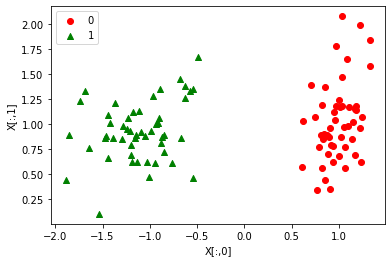

In [43]:
for i in range(len(y)):
  if y[i] == 0:
    s1 = plt.scatter(X[i,0],X[i,1],c='r')
  else:
    s2 = plt.scatter(X[i,0],X[i,1],c='g',marker='^')
plt.xlabel("X[:,0]")
plt.ylabel("X[:,1]")
plt.legend((s1,s2),('0','1'),loc='best')

所以，我们可以用np生成随机数组，让这些数据点可以加减0~1之间的随机数。但是不能运行多次

In [73]:
rng = np.random.RandomState(2) #random mode
X += 2*rng.uniform(size=X.shape)


In [74]:
linearly_separable = (X,y)#把二分数据给保存起来

我们把新数据用图来展示，看看是什么样子的

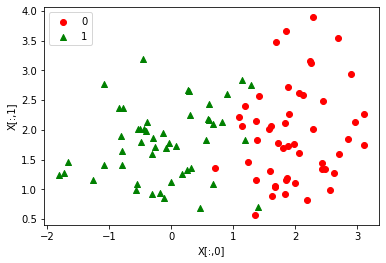

In [45]:
for i in range(len(y)):
  if y[i] == 0:
    s1 = plt.scatter(X[i,0],X[i,1],c='r')
  else:
    s2 = plt.scatter(X[i,0],X[i,1],c='g',marker='^')
plt.xlabel("X[:,0]")
plt.ylabel("X[:,1]")
plt.legend((s1,s2),('0','1'),loc='best')

###generate moon dataset

In [77]:
X_moon, y_moon = make_moons(n_samples=100,noise=0.3,random_state=0)
print(X[0:5])
print(y[0:5])

[[-0.17749658  0.93049627]
 [ 1.97742406  1.76615529]
 [ 1.80002379  1.7003428 ]
 [-0.77083686  2.35916348]
 [-0.30800901  1.59406316]]
[1 0 0 1 1]


In [78]:
moon_shape_data = (X_moon, y_moon) #store the moon dataset

visualize the moon shape dataset

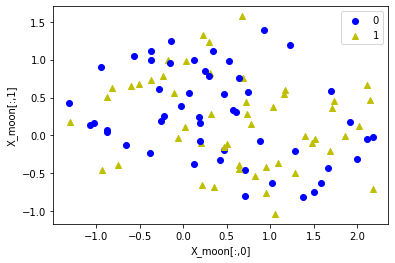

In [79]:
for i in range(len(y_moon)):
  if y[i] == 0:
    s1 = plt.scatter(X_moon[i,0],X_moon[i,1],c='b')
  else:
    s2 = plt.scatter(X_moon[i,0],X_moon[i,1],c='y',marker='^')
plt.xlabel("X_moon[:,0]")
plt.ylabel("X_moon[:,1]")
plt.legend((s1,s2),('0','1'),loc='best')

###generate circles dataset

In [81]:
X_circles, y_circles = make_circles(n_samples=100,noise = 0.2, factor = 0.5, random_state=1)
print(X[0:5])
print(y[0:5])

[[-0.17749658  0.93049627]
 [ 1.97742406  1.76615529]
 [ 1.80002379  1.7003428 ]
 [-0.77083686  2.35916348]
 [-0.30800901  1.59406316]]
[1 0 0 1 1]


In [82]:
circle_shape_data = (X_circles,y_circles)#保存circle data

visualize circle dataset

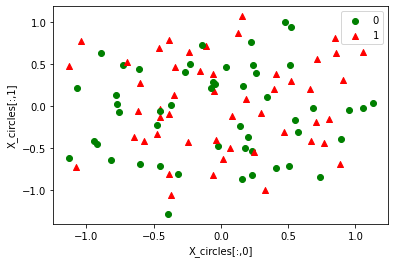

In [71]:
for i in range(len(y_circles)):
  if y[i] == 0:
    s1 = plt.scatter(X_circles[i,0],X_circles[i,1],c='g')
  else:
    s2 = plt.scatter(X_circles[i,0],X_circles[i,1],c='r',marker='^')
plt.xlabel("X_circles[:,0]")
plt.ylabel("X_circles[:,1]")
plt.legend((s1,s2),('0','1'),loc='best')

将三组数据打包起来放进datasets中

In [83]:
datasets = [moon_shape_data,circle_shape_data,linearly_separable]

##画出三种数据集合三棵决策树的分类效应图像

In [ ]:
#create figure the size is 6*9
figure = plt.figure(figsize=(6,9))

#the global variable which uses to indicate the graph position
i = 1

